# Quantum Computer lab 1 

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* This notebook introduces some of the basic quantum circuit functionality in the pennylane module
* Please run the code to make sure it works, then try the questions.

There is documentation about pennylane at https://pennylane.ai/

##  Goals of the lab

* Simulate quantum circuits using pennylane
* Navigate the pennylane documentation to solve problems
*  Install and run the pennylane modules

In later labs we will investigate introducing using pennylane to solve bigger problems.

## Exercises on the pennylane system

To get started we will work with the online pennylane system

* Please create an account on the pennylane https://pennylane.ai/ Use the **sign in** button at the top right hand side of the screen to create an account



The Pennylane system has a series of exercises that can be run on their web system. You can run the results and check that the correct answer is obtained.

From https://pennylane.ai/codebook/02-single-qubit-gates/01-x-and-h
* work through 1.4.1
* work through 1.4.2
* work through 1.4.3

Learning Objectives:

* Explain why we can understand how an operation works by applying it to the basis states.
* Describe the action of the X gate, its matrix representation, and eigenvalues.
* Describe the action of the Hadamard gate, its matrix representation, and eigenvalues.


##  Installing pennylane on the University machines and your laptop

There are instructions on how to install pennylane on your computer at: https://pennylane.ai/install/

In the annaconda prompt or terminal on a Mac type 

pip install pennylane --upgrade

If you have spyder running you may need to restart spyder to access the library.

You will have to run this command everytime you work on a new PC in the lab.

There may be  additional complications with the University PCs,because of administrative rights. 


## Running a pennylane circuit on your laptop

The code below creates a circuit and does 1024 measurements on it


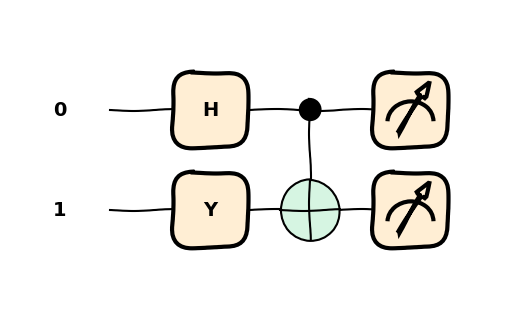

In [3]:
import pennylane as qml
import matplotlib.pyplot as plt
import sys

dev = qml.device("default.qubit", shots=1024)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliY(wires=1)
    qml.CNOT(wires=[0, 1])
    
    return qml.counts(wires=[0, 1])

qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")()
plt.show()


The code below creates a histogram from the measurements

{'01': tensor(537, requires_grad=True), '10': tensor(487, requires_grad=True)}


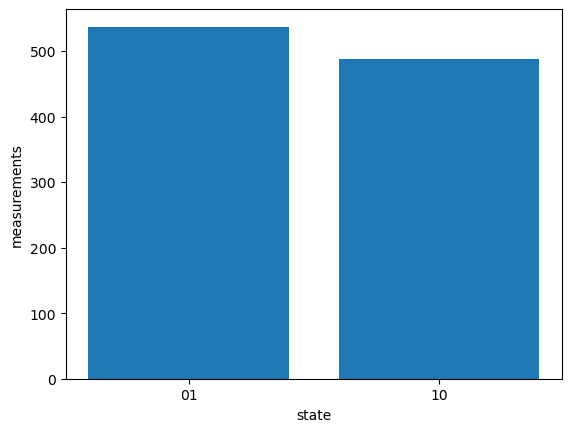

In [4]:
ans = circuit()
print(ans)

#sys.exit(0)

state = []
res = [] 
for state_ in ans :
    state.append(str(state_))
    res.append(int(ans[state_]))

plt.bar(state, res)
plt.xlabel("state")
plt.ylabel("measurements")

plt.show()


### Question 2

* Use the theory of quantum circuits to explain the above histogram. The input to the circuit is |0>



###  Question 3 on the one qubit circuit

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/2circuit.png?raw=true" alt="1qubit circuit"> 

* Modify the code above to implement the above quantum circuit (that was used in lectures)
* Do the measurements correspond to the theoretical result for the input $\mid 0 \rangle$
* Run the circuit for 512, 1024, 2048 shots. Do you notice any patterns?


## Question 4

 <img src="https://github.com/cmcneile/Quantum_Computing_lab_2023/blob/main/InitCircuit.png?raw=true" alt="2 qubit circuit"> 
 
 * Modify the above code to implement this circuit that was shown in lectures (and the diagram above)
 * Assume an input state of $\mid 00 >$ apply the above quantum circuit and find the output state.
 * Does the numerical result agree with the theoretical result

## Question 5 (superdense coding)

* In the second lecture of the module we studied superdense coding where two classical bits are transformed by sending one qubit from Alice to Bob.
* There is a qiskit example:
* https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/entanglement-in-action#superdense-coding


In [2]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

ModuleNotFoundError: No module named 'qiskit'

The numbers below are the classical bits to transmit

In [20]:
c = "1"
d = "0"

In [21]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw())

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 10 with frequency 1.0


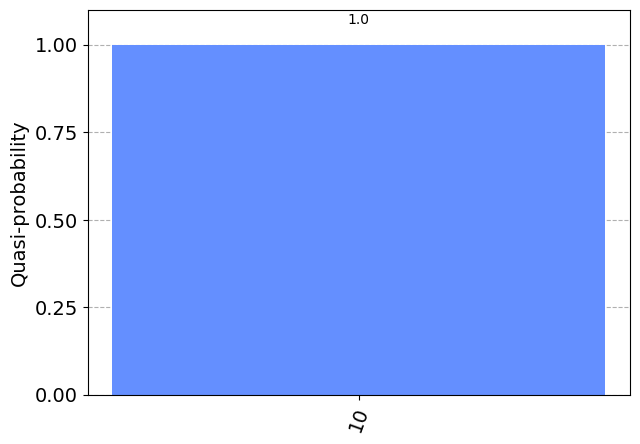

In [22]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

* Run the qiskit code above for the cases: 00, 01, 10, 11
* Check that the circuit works. If it does not work, modify the code

